SNR=-10dB


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


SNR=-9dB


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


SNR=-8dB


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


SNR=-7dB


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


SNR=-6dB


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


SNR=-5dB


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


SNR=-4dB


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


SNR=-3dB


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


SNR=-2dB


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


SNR=-1dB


100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
SNR=-10dB


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


SNR=-9dB


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


SNR=-8dB


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


SNR=-7dB


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


SNR=-6dB


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


SNR=-5dB


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


SNR=-4dB


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


SNR=-3dB


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


SNR=-2dB


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


SNR=-1dB


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


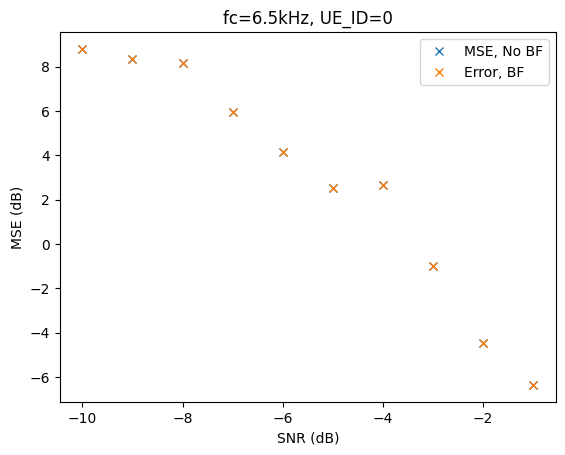

'\nfig,ax = plt.subplots()\nax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c=\'r\', marker=\'x\')\nax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c=\'g\', marker=\'x\')\nax.scatter(np.real(true_sym), np.imag(true_sym), c=\'b\',marker=\'o\')\nax.legend([\'RX DL, no BF\', \'RX DL, BF\',\'16QAM Constellation Points\'])\nax.set_ylim(-4, 4)\nax.set_xlim(-4,4)\nax.set_title("Constellation Diagram for SNR=15dB")\nplt.show()\n'

In [1]:
from bf_multichannel import bf_multichannel
from tx_gnb_sim import tx_gnb_sim
import numpy as np
import matplotlib.pyplot as plt


# fc = 6.5kHz
n_UE = 1 # 2
# n_path = 2?
My_bf = bf_multichannel(6.5e3, 2, 1,n_UE)
# rx at (0,0)
# tx_1 at (5,5) and (7.5,5) with a wall at x=10
# after relection, tx_2 at (15,5) and (12.5,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])
#My_bf.reflection_list = np.array([1,0.5]) # what does reflection_list accomplish?
#My_bf.x_tx_list = np.array([5,15,7.5,12.5])
#My_bf.y_tx_list = np.array([5,5,5,5])

# rethink with this math

theta_bf = -1.2

My_ue_nobf = tx_gnb_sim(6.5e3, 1, 1, theta=180+45, apply_bf=False)
# do not assume independence
My_ue_nobf.reflection_list = np.array([1,0.5]) # this shouldn't play a part
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
My_ue_nobf.x_rx_list = My_bf.x_tx_list
My_ue_nobf.y_rx_list = My_bf.y_tx_list
My_ue_nobf.simulation()
mse_no_bf = My_ue_nobf.mean_mse
print(My_ue_nobf.steering_vec)
symbolset_no_bf = My_ue_nobf.mean_symbols[-1,:]

true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))
My_ue = tx_gnb_sim(6.5e3, 1, 1, theta=np.deg2rad(theta_bf+115), apply_bf=True) #mystical offset
My_ue.simulation()
symbolset_bf = My_ue.mean_symbols[-1,:]
mse_bf =  My_ue.mean_mse
for i_UE in range(0,n_UE):
    plt.figure(i_UE)
    plt.plot(My_ue_nobf.snr_list, mse_no_bf[:,i_UE], 'x')
    plt.plot(My_ue.snr_list, mse_bf[:,i_UE], 'x')
    plt.legend(['MSE, No BF', 'Error, BF'])
    plt.xlabel('SNR (dB)')
    plt.ylabel('MSE (dB)')
    plt.title(f'fc={My_bf.fc/1000:.1f}kHz, UE_ID={i_UE}')
plt.show()

"""
fig,ax = plt.subplots()
ax.scatter(np.real(symbolset_no_bf), np.imag(symbolset_no_bf), c='r', marker='x')
ax.scatter(np.real(symbolset_bf), np.imag(symbolset_bf), c='g', marker='x')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b',marker='o')
ax.legend(['RX DL, no BF', 'RX DL, BF','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""